In [1]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
import read_keplerlc as kep
import tls

In [2]:
###Solve OFFSET PROBLEM !!!!

In [10]:
t=np.linspace(0,100,133)
t0=50
H=-3.0
W=30.0
L=5
x=tls.gen_trapzoid(t,H,W,L,t0)
sigma=0.3
x=x+np.random.normal(0,sigma,len(x))

In [4]:
Wl=np.linspace(20.0,35.0,40) 
Ll=np.linspace(0.0,10.0,40) 
tl=np.linspace(0,100.0,100) 
arr=[]
arrt0=[]
arrW=[]
arrL=[]

for iW in Wl:
    for iL in Ll:
        for it0 in tl:
            d=tls.get_chi2Hmax(t,x,iW,iL,it0,sigma)
            arr.append(d)
            arrt0.append(it0)
            arrW.append(iW)
            arrL.append(iL)

arr=np.array(arr)
arrt0=np.array(arrt0)
arrL=np.array(arrL)

/home/kawahara/gbls/tls.py:73: RuntimeWarning: invalid value encountered in double_scalars
  Hmax=-numB/denA
/home/kawahara/gbls/tls.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  Hmax=-numB/denA


KeyboardInterrupt: 

In [11]:
xpre,H,W,L,T0,offset=tls.tlsfit(t,x)

/home/kawahara/gbls/tls.py:73: RuntimeWarning: invalid value encountered in double_scalars
  Hmax=-numB/denA
/home/kawahara/gbls/tls.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  Hmax=-numB/denA


17650


/home/kawahara/gbls/tls.py:103: RuntimeWarning: invalid value encountered in true_divide
  sn=-arr[:,0]/np.sqrt(arr[:,1]/(arr[:,2]-3))


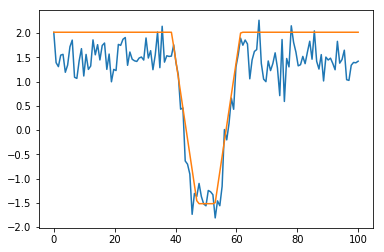

In [12]:
fig=plt.figure()
plt.plot(t,x)
plt.plot(t,xpre)
plt.show()

In [11]:
sn=-arr[:,0]/(arr[:,1]/(arr[:,2]-3))*(np.sqrt(arr[:,2]/2))

/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [6]:
np.shape(sn)

(160000,)

-2.96110483721 29.6153846154 6.66666666667 50.5050505051 0.633362657816 0.113002709572
-3.0 30.0 5 50


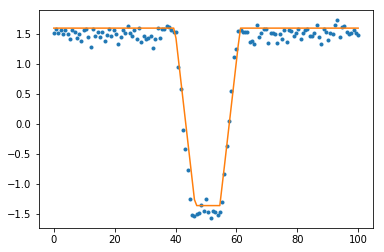

In [12]:
#0: Hmax=sig, res=residual, n=# of the datapoint, 
#sn: (-)Hmax/(res/(n - par dof)) 

#sn=-arr[:,0]/(arr[:,1]/(arr[:,2]-3))*(np.sqrt(arr[:,2]/2))
sn=1.0/(arr[:,1]/(arr[:,2]-3))*(np.sqrt(arr[:,2]/2))
imax=np.nanargmax(sn)
xpre=tls.gen_trapzoid(t,arr[imax,0],arrW[imax],arrL[imax],arrt0[imax])+arr[imax,3]
print(arr[imax,0],arrW[imax],arrL[imax],arrt0[imax],sn[imax],arr[imax,3])
print(H,W,L,t0)
plt.plot(t,x,".")
plt.plot(t,xpre)
plt.savefig("test.png")
plt.show()

In [215]:
np.sum(x)

128.46231661304435

Text(0,0.5,'S/N')

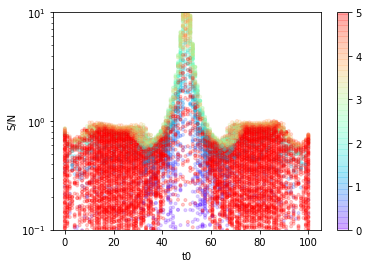

In [156]:
a=plt.scatter(arrt0,-arr[:,0]/(arr[:,1]/arr[:,2]),alpha=0.2,marker=".",c=-arr[:,0],vmin=0.0,vmax=5.0,cmap="rainbow")
plt.colorbar(a)
plt.yscale("log")
plt.xlabel("t0")
#plt.xlim(-5,0)
plt.ylim(0.1,10)
plt.ylabel("S/N")

Text(0,0.5,'S/N')

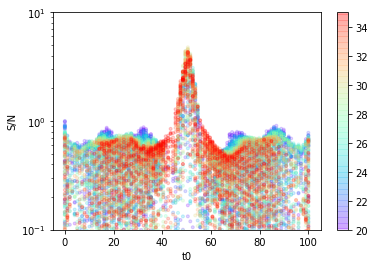

In [119]:
a=plt.scatter(arrt0,-arr[:,0]/(arr[:,1]/arr[:,2]),alpha=0.2,marker=".",c=arrW,cmap="rainbow")
plt.colorbar(a)
plt.yscale("log")
plt.xlabel("t0")
#plt.xlim(-5,0)
plt.ylim(0.1,10)
plt.ylabel("S/N")

Text(0,0.5,'S/N')

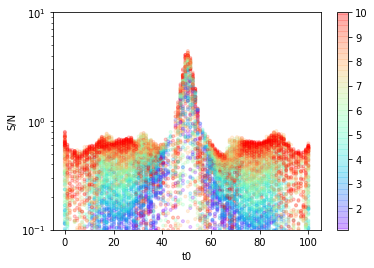

In [130]:
a=plt.scatter(arrt0,sn,alpha=0.2,marker=".",c=arrL,cmap="rainbow")
plt.colorbar(a)
plt.yscale("log")
plt.xlabel("t0")
#plt.xlim(-5,0)
plt.ylim(0.1,10)
plt.ylabel("S/N")

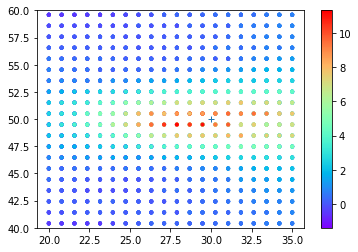

In [185]:
a=plt.scatter(arrW,arrt0,marker=".",c=sn,cmap="rainbow")
plt.plot(W,t0,"+")
plt.ylim(40,60)
plt.colorbar(a)


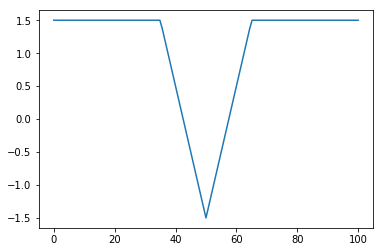

In [6]:
t=np.linspace(0,100,133)
t0=50
H=-3.0
W=30.0
L=W/2
x=tls.gen_trapzoid(t,H,W,L,t0)
plt.plot(t,x)
plt.show()